In [1]:
# from swaptest import cswaptest
import numpy as np
import random as rd
import sys
sys.path.insert(1, '../')
import base.knn, itertools 
from sklearn import datasets
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

In [2]:
# hyperparameter
n_variables = 4
n_train_points = 4
n_test_points = int(n_train_points*0.3)
k = 1
iteration = 2

In [4]:
# use iris dataset
iris = datasets.load_iris()
labels = iris.target
data_raw = iris.data

# encode data
data_raw = base.knn.encode(data_raw[:, :n_variables])

# get training indices
randomIndices0 = rd.sample(range(0, 50), int(n_train_points/3))
randomIndices1 = rd.sample(range(55, 100), int(n_train_points/3))
randomIndices2 = rd.sample(range(105, 150), n_train_points-int(n_train_points/3)*2)
indicsTrain = list(itertools.chain(randomIndices0, randomIndices1, randomIndices2))

# get test indices
n_test = n_test_points
indicsTest = []
while n_test != 0:
    random = (rd.sample(range(0, 150), 1))[0]
    if random not in indicsTest:
        indicsTest.append(random)
        n_test = n_test - 1

# pick these state and its labels with given indices
train_datas = np.asarray([data_raw[i] for i in indicsTrain])
train_labels =  np.asarray([labels[i] for i in indicsTrain])
test_datas = np.asarray([data_raw[i] for i in indicsTest])
test_labels =  np.asarray([labels[i] for i in indicsTest])

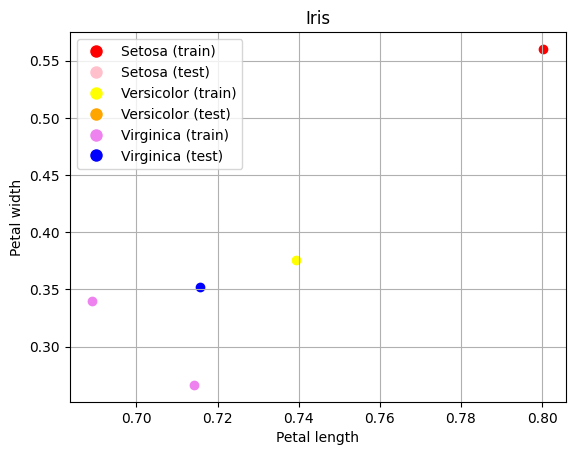

In [5]:
# plot data
train_colors = {0:'red', 1:'yellow', 2:'violet'}
test_colors = {0:'pink', 1:'orange', 2:'blue'}
fig, ax = plt.subplots()
for i in range(len(train_datas)):
    ax.scatter(train_datas[i][0], train_datas[i][1], color = train_colors[train_labels[i]])
for i in range(len(test_datas)):
    ax.scatter(test_datas[i][0], test_datas[i][1], color = test_colors[test_labels[i]])
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Setosa (train)',  markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Setosa (test)',  markerfacecolor='pink', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Versicolor (train)',  markerfacecolor='yellow', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Versicolor (test)',  markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Virginica (train)',  markerfacecolor='violet', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Virginica (test)',  markerfacecolor='blue', markersize=10),
]
ax.legend(handles=legend_elements)
plt.title('Iris')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.grid(True)
plt.show()

In [6]:
# run QkNN
predict_labels = np.asarray(base.knn.predict(train_datas, train_labels, test_datas, k, iteration))
accuracy, precision, recall, matrix = base.knn.bench_mark(test_labels, predict_labels)
print('Predict labels: ', predict_labels)
print('Test labels: ', test_labels)
print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('matrix: ', matrix)

Progress 0%
Predict labels:  [2]
Test labels:  [2]
accuracy:  1.0
precision:  1.0
recall:  1.0
matrix:  [[1]]
